## Analyse the data using pandas

In [127]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667369,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376802,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


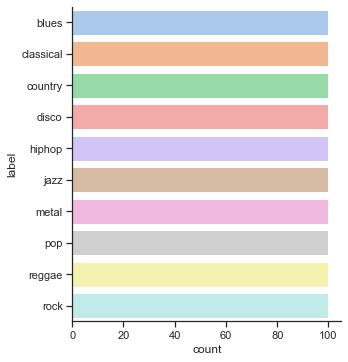

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.catplot(y= 'label', kind= 'count', data= data, palette = 'pastel')

In [129]:
data.shape

(1000, 28)

In [130]:
data = data.drop(['filename'], axis=1) # drop name of the column which is unnecessary

## Encoding the labels

In [131]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
labels = data.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

## Scaling the feature columns

In [132]:
scaler=StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

## split the dataset 

In [133]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape
train_x.shape[1]

26

In [134]:
#reshaping into 2d array
train_x=np.reshape(train_x,(train_x.shape[0],13,2,1))
test_x=np.reshape(test_x,(test_x.shape[0],13,2,1))
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((800, 13, 2, 1), (200, 13, 2, 1), (800,), (200,))

In [135]:
from keras.utils.np_utils import to_categorical
train_y=to_categorical(train_y, num_classes=10)
test_y=to_categorical(test_y, num_classes=10)
train_y.shape, test_y.shape
train_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Building our neural network

In [136]:
from keras import Sequential
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
model=Sequential()

In [137]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu",input_shape=(13,2,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(512,activation="relu"))
# model.add(Dropout(0.35))

model.add(Dense(10,activation="softmax"))

In [138]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [139]:
#training the model
model.fit(train_x,train_y,batch_size=64,epochs=100,validation_data=(test_x,test_y))

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 2.2714 - accuracy: 0.1762 - val_loss: 2.1143 - val_accuracy: 0.3000
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 1.8991 - accuracy: 0.3200 - val_loss: 1.7145 - val_accuracy: 0.3450
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 1.6918 - accuracy: 0.3600 - val_loss: 1.6262 - val_accuracy: 0.4200
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 1.5681 - accuracy: 0.3963 - val_loss: 1.5610 - val_accuracy: 0.4150
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 1.4880 - accuracy: 0.4400 - val_loss: 1.4730 - val_accuracy: 0.4400
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 1.4272 - accuracy: 0.4663 - val_loss: 1.4703 - val_accuracy: 0.4350
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 1.3559 - accuracy: 0.

800/800 [==============================] - 1s 1ms/step - loss: 0.0951 - accuracy: 0.9663 - val_loss: 2.0437 - val_accuracy: 0.6250
Epoch 58/100
800/800 [==============================] - 1s 1ms/step - loss: 0.1234 - accuracy: 0.9513 - val_loss: 2.1655 - val_accuracy: 0.6700
Epoch 59/100
800/800 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.9650 - val_loss: 2.0376 - val_accuracy: 0.6450
Epoch 60/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0695 - accuracy: 0.9750 - val_loss: 2.0507 - val_accuracy: 0.6450
Epoch 61/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0614 - accuracy: 0.9825 - val_loss: 2.1768 - val_accuracy: 0.6550
Epoch 62/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0926 - accuracy: 0.9675 - val_loss: 2.1724 - val_accuracy: 0.6800
Epoch 63/100
800/800 [==============================] - 1s 1ms/step - loss: 0.1022 - accuracy: 0.9700 - val_loss: 2.1259 - val_accuracy: 0.6600
Epoch